In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")  # 124M model
state_dict_hf = model_hf.state_dict()

for k, v in state_dict_hf.items():
    print(k, v.shape)

/Users/aayushgarg/pkgs/miniconda3/envs/diffusers/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [ ]:
# here, wte is the embedding matrix for the tokens (vocab_size: 50257, embedding_dim: 768)
# wpe is the learnt positional embedding matrix (seq_len: 1024, embedding_dim: 768)
# - If I visualize the positional embeddings, I see sinusoidal-like structure emerge:
#   - Each row represents a position, and optimization has shaped them to resemble sinusoidal and cosinusoidal patterns
#   - Unlike the original Transformer paper where sinusoidal embeddings were fixed, GPT-2 trains these parameters from scratch and they converge to similar patterns
#   - Some channels show noisy curves, suggesting the model wasn't fully trained to convergence
#   - Overall the embeddings capture positional information effectively

In [7]:
import matplotlib.pyplot as plt

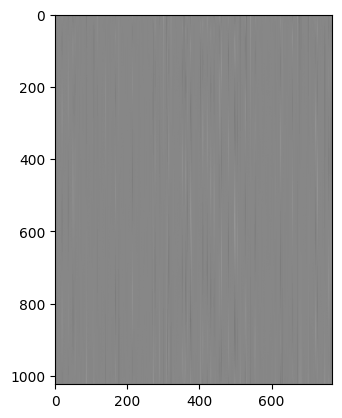

In [10]:
plt.imshow(state_dict_hf["transformer.wpe.weight"], cmap="gray")

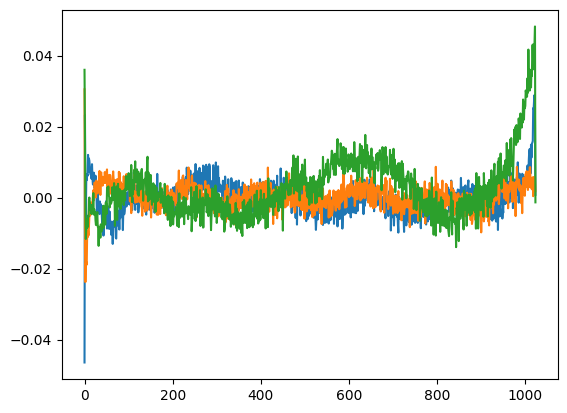

In [6]:
plt.plot(state_dict_hf["transformer.wpe.weight"][:, 150])
plt.plot(state_dict_hf["transformer.wpe.weight"][:, 500])
plt.plot(state_dict_hf["transformer.wpe.weight"][:, 600])

In [ ]:
# Generati

In [11]:
from transformers import pipeline, set_seed

generator = pipeline("text-generation", model="gpt2")
set_seed(42)
start_text = "Hello, I'm a language model,"
generator(start_text, max_length=50, num_return_sequences=5)

/Users/aayushgarg/pkgs/miniconda3/envs/diffusers/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself. It is not the Python, but rather: Python is the open source language, inspired by Python"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know how to represent our language. In order to know how to express a model, though, my code"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that front, and the compiler that comes with them was just sort of a mess.\n\nPorter"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how it works.\n\nYou hear me when you write to me.\n\nWell, I'm"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to giv